In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras.preprocessing import image
import random

In [ ]:
## here I am getting the mnist dataset from tensorflow ##
mnist = tf.keras.datasets.mnist

In [ ]:
## here I am splitting the dataset into training data and test data ##
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

In [ ]:
X_train[0].shape

In [ ]:
## here I am normalizing my data for each pixel to be either a 0 or a 1 ##
X_train = X_train/255.0
x_test = X_test/255.0

In [ ]:
## here I am making a sequential machine learning model ##
model = keras.Sequential()

## here I am making an LSTM with 128 units and my activation function is Relu ##
## return_sequences = True: this makes sure the output is 3d, therefore we can allow stacking of LSTM layers
model.add(LSTM(units=128, activation='relu', return_sequences=True))
## here I am doing a dropout to prevent my model from overfitting ##
## 20% of the neurons in my neural network will be stopped / disabled ##
model.add(Dropout(0.2))

model.add(LSTM(units=128, activation='relu'))
model.add(Dropout(0.2))

## here I have a fully connected Dense layer with 32 neurons I am using Relu for my activation function ##
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

## here I have an ouptut of 10 neurons, I use soft-max to get a probability for each class ##
model.add(Dense(10, activation='softmax'))

In [ ]:
## this gives me a summary of my model ##
model.summary()

In [ ]:
## here I am setting the learning rate to be very small, this is used for the adjustment of the weights during training ##
## and I am also using decay, decay recues the learning rate over time to improve convergence and prevent overshooting ## 
opt = tf.keras.optimizers.Adam(learning_rate=1e-3, decay=1e-5)

In [ ]:
## here I am setting the loss to be: used for multi-class classification, this is for integers. ##
## for optimizer I am setting the configuration for the weight adjustment while in training ##
## then I get the accuracy during training and evaluation ## 
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
plt.imshow(X_train[4])

In [ ]:
## here I am training my rnn(sequential) model, on my X_train and y_train ##
## I train my model for 3 epochs. An epoch is one iteration over the entire training dataset ##
## then I have my validation_data, this is used to evaluate performance on unseen data after each epoch ## 
model.fit(X_train, y_train, epochs=3, validation_data=(x_test, y_test))

In [ ]:
## here I have wrote a function. My function takes in a number(index), depending on what number you enter
## this is go the the X_train index for the number that is entered, then my model will predict what number it thinks it is,
## this is based off the training data ##
def rnnPredictNumber(number):
    img_array = X_train[number]

    ## here I am adding a batch dimension, this is because the model expects a batch for an input ## 
    img_array = np.expand_dims(img_array, axis=0)
    
    ## here my model makes a prediction ## 
    predictions = model.predict(img_array)

    ## here my model finds the class with the highest probability
    predicted_class = np.argmax(predictions)
    print(f"Predicted class: {predicted_class}")

    plt.figure(figsize=(5, 5))
    plt.imshow(img_array.squeeze(), cmap="gray") 

    ## here I am removing a dimension and showing it in greg-scale ## 
    plt.title(f"Predicted: {predicted_class}")
    
    ## here I turn off the numbers on the matplotlib graph ## 
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted class: 8


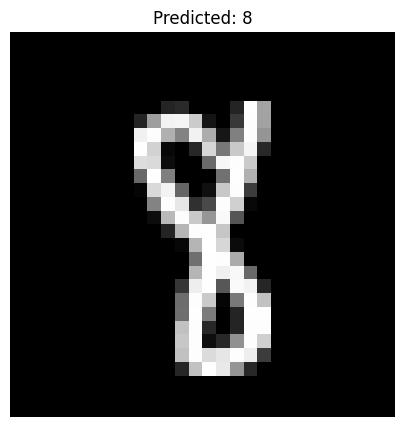

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: 0


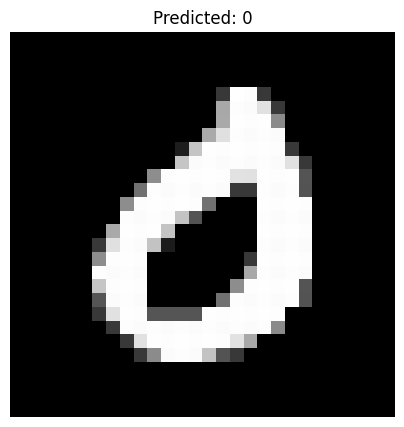

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: 7


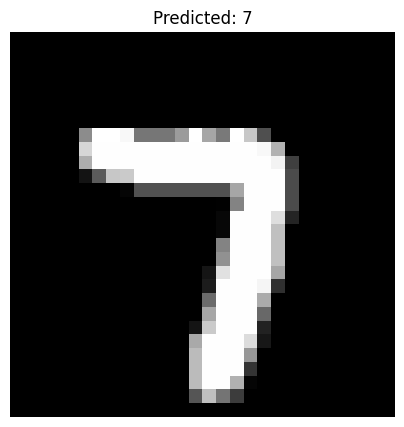

In [18]:
for i in range(0, 3):
    ## here I get a random number(image) in my test data ##
    randomNumberImage = random.choice(range(len(x_test)))
    
    ## then I call my rnn model and I pass in the "randomNumberImage" variable
    rnnPredictNumber(randomNumberImage)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: 4


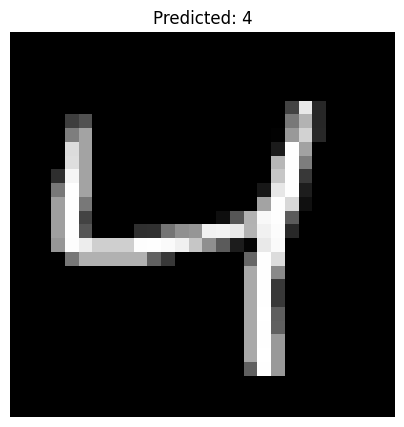

In [22]:
rnnPredictNumber(2)